In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Cargamos en memoria el csv de bloques. Para mayor detalle del schema acceder a https://ethereum-etl.readthedocs.io/en/latest/schema/
blocks = pd.read_csv('blocks.csv')

In [3]:
# Se filtra el bloque génesis para evitar hacer ruido
block_genesis = blocks[blocks['number'] == 0]
blocks = blocks[blocks['number'] != 0]

# Ordenamos el dataset
blocks.sort_values(by='number', inplace=True)

# Transformamos el timestamp a una fecha legible
blocks['timestamp'] = pd.to_datetime(blocks['timestamp'], unit='s', utc=True)

# Bloques totales, Fecha mín y máx
total_blocks = len(blocks) + 1 # Se suma 1 por el bloque génesis filtrado
min_date = blocks['timestamp'].min()
max_date = blocks['timestamp'].max()

# Bloques vacíos (sin transacciones)
empty_blocks = len(blocks[blocks['transaction_count'] == 0])

# Bloques con transacciones y porcentaje del total
blocks_with_tx = len(blocks[blocks['transaction_count'] > 0])
percentage_with_tx = (blocks_with_tx / total_blocks) * 100

# Promedio, mín y máx de Transacciones por día
avg_tx_day = blocks.groupby(blocks['timestamp'].dt.date)['transaction_count'].sum().mean()
min_tx_day = blocks.groupby(blocks['timestamp'].dt.date)['transaction_count'].sum().min()
max_tx_day = blocks.groupby(blocks['timestamp'].dt.date)['transaction_count'].sum().max()

# Máx y mín de gas usado y relación entre cant de tx y gas usado
max_gas_used = blocks['gas_used'].max()
min_gas_used = blocks['gas_used'].min()
relation_tx_gas = blocks[['transaction_count', 'gas_used']].corr().iloc[0, 1]

# Tabla de mineros y cantidad de bloques minado por cada uno
miner_blocks = blocks['miner'].value_counts().reset_index()
miner_blocks.columns = ['Miner', 'Blocks Made']

# Promedio de diferencia entre cada bloque, mín y máx
blocks['time_diff'] = blocks['timestamp'].diff().dt.total_seconds().fillna(0)
avg_time_diff = blocks['time_diff'].mean()
max_time_diff = blocks['time_diff'].max()
min_time_diff = blocks[blocks['time_diff'] > 0]['time_diff'].min()

In [7]:
min_time_diff = blocks[blocks['time_diff'] > 0]['time_diff'].min()

In [5]:
blocks

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,time_diff
21,1,0xad3e4c94e2fd8781e971fc83e2d0d2fb63f15bc94391...,0xad44151f29d16eaddd7041a402b9b0c0e455128f6066...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0xc462e719e177b935ded20419834079f47f3c38dab40f...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x0000000000000000000000000000000000000000,1,1,902,0x00000000000000000000000000000000000000000000...,30000000,0,2023-05-15 23:38:20+00:00,0,NaN,0.0
22,2,0x2567d362c94114b2dd5a4da77410cc01f0b023376864...,0xad3e4c94e2fd8781e971fc83e2d0d2fb63f15bc94391...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0xc462e719e177b935ded20419834079f47f3c38dab40f...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x0000000000000000000000000000000000000000,2,2,1105,0x00000000000000000000000000000000000000000000...,30000000,0,2023-05-15 23:38:25+00:00,0,NaN,5.0
23,3,0x647596d2aa3c9ab66773aee48731b8c4eecec76cf3e8...,0x2567d362c94114b2dd5a4da77410cc01f0b023376864...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0xc462e719e177b935ded20419834079f47f3c38dab40f...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x0000000000000000000000000000000000000000,3,3,1105,0x00000000000000000000000000000000000000000000...,30000000,0,2023-05-15 23:38:30+00:00,0,NaN,5.0
24,4,0x39930de0b8eab96d66b93c7a114eadcd5212141b9310...,0x647596d2aa3c9ab66773aee48731b8c4eecec76cf3e8...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0xc462e719e177b935ded20419834079f47f3c38dab40f...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x0000000000000000000000000000000000000000,4,4,1105,0x00000000000000000000000000000000000000000000...,30000000,0,2023-05-15 23:38:35+00:00,0,NaN,5.0
25,5,0x60a50b5cd1b26af70d91c30392c1488543082f81028c...,0x39930de0b8eab96d66b93c7a114eadcd5212141b9310...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0xc462e719e177b935ded20419834079f47f3c38dab40f...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x0000000000000000000000000000000000000000,5,5,1105,0x00000000000000000000000000000000000000000000...,30000000,0,2023-05-15 23:38:40+00:00,0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054085,6054105,0x7902ce43656f7a38c9c4c516b51a0c3f54e6c1b32381...,0x841c360b675976f7c69dc0b96dedbd1b60e45ca9d694...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x1310f4cd4df4cd69f1afd5df57227844e558d6547f88...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x0000000000000000000000000000000000000000,6054105,6054105,1620,0x00000000000000000000000000000000000000000000...,30000000,0,2024-02-01 04:59:42+00:00,0,NaN,2.0
6054086,6054106,0xe87af627ddaa8905ad112f44a29832f849644f9e7c97...,0x7902ce43656f7a38c9c4c516b51a0c3f54e6c1b32381...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x1310f4cd4df4cd69f1afd5df57227844e558d6547f88...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x0000000000000000000000000000000000000000,6054106,6054106,1620,0x00000000000000000000000000000000000000000000...,30000000,0,2024-02-01 04:59:44+00:00

In [4]:
miner_blocks

,Miner,Blocks Made
0,0x0000000000000000000000000000000000000000,6054087
1,0x6d4e160e96557a1ccef917f9acaf42d919384f18,7
2,0x9e905c3784bc5baa3885a7dcc1496b5c4ca25e1e,5
3,0x59ce0c74e5eceb7bf35e7af484b8cae27126e60f,4
4,0xc3a921669f3f092718ec6fe6857203801cdfd411,3
5,0xb31f758fc5de2f4050a36b94a05da1da19960e36,3


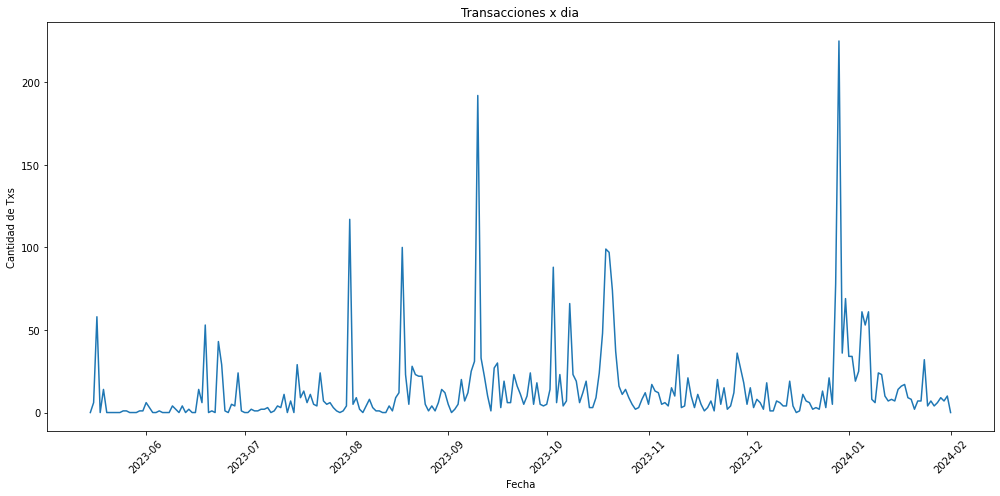

In [14]:
# Gráfico de Transacciones x día
blocks.groupby(blocks['timestamp'].dt.date)['transaction_count'].sum().plot(figsize=(14, 7))
plt.title('Transacciones x dia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Txs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

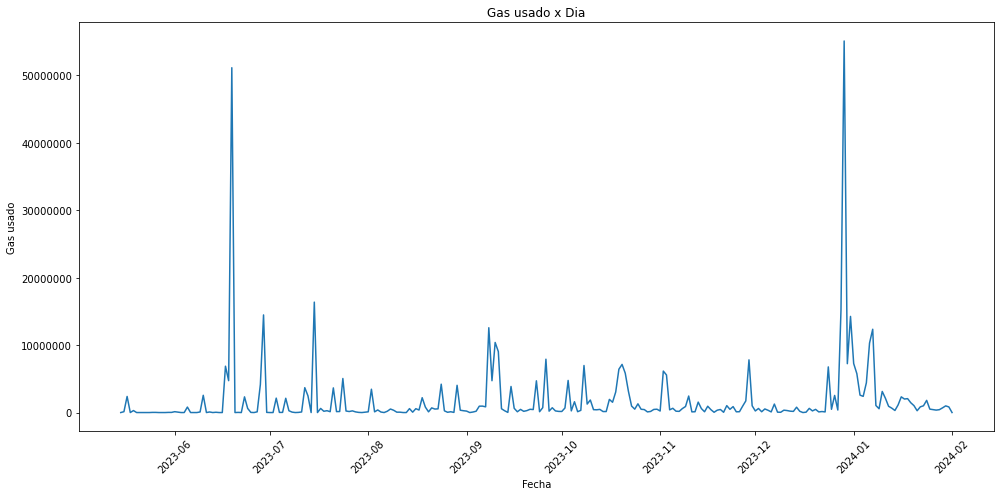

In [15]:
# Gráfico de gas usado x día
blocks.groupby(blocks['timestamp'].dt.date)['gas_used'].sum().plot(figsize=(14, 7))
plt.title('Gas usado x Dia')
plt.xlabel('Fecha')
plt.ylabel('Gas usado')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

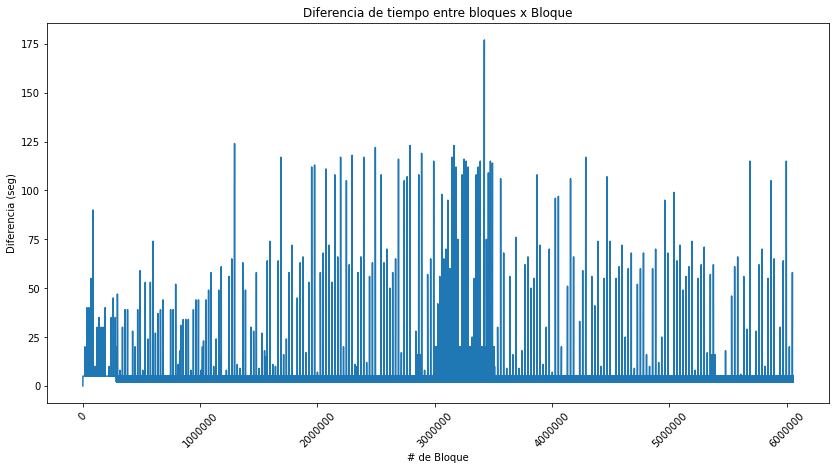

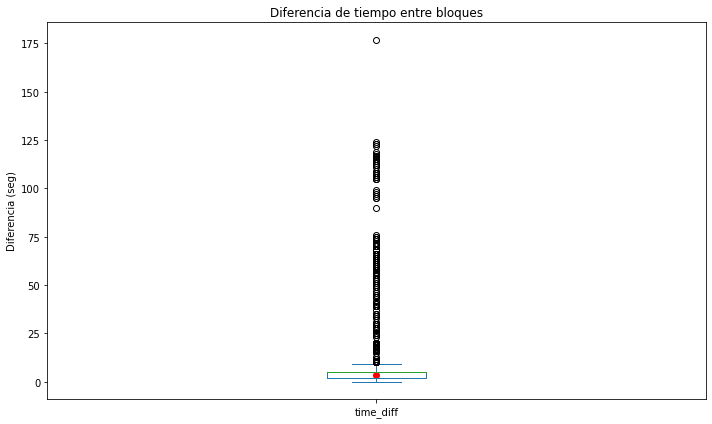

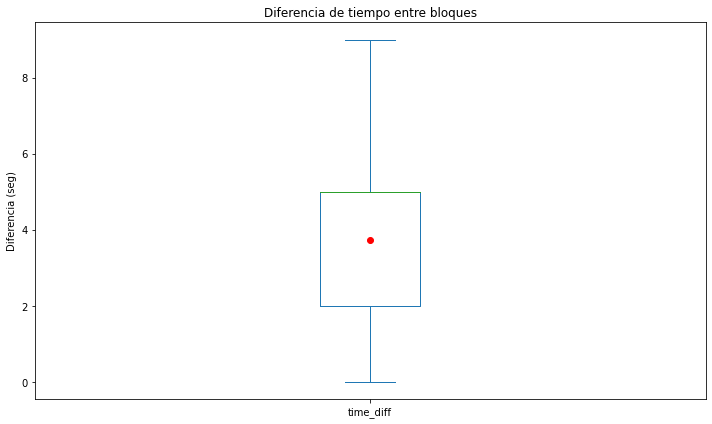

In [19]:
# Gráfico de diferencia de tiempo entre bloques
blocks['time_diff'].plot(figsize=(14, 7))
plt.title('Diferencia de tiempo entre bloques x Bloque')
plt.xlabel('# de Bloque')
plt.ylabel('Diferencia (seg)')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.show()

# Gráfico de bigotes con la diferencia entre bloques
blocks['time_diff'].plot(kind='box', figsize=(10, 6))
plt.title('Diferencia de tiempo entre bloques')
plt.ylabel('Diferencia (seg)')
plt.scatter(1, avg_time_diff, color='red', label='Mean')
plt.tight_layout()
plt.show()

# Gráfico de bigotes con la diferencia entre bloques sacando outliers
blocks['time_diff'].plot(kind='box', figsize=(10, 6), showfliers=False)
plt.title('Diferencia de tiempo entre bloques')
plt.ylabel('Diferencia (seg)')
plt.scatter(1, avg_time_diff, color='red', label='Mean')
plt.tight_layout()
plt.show()


In [8]:
print(f"Total de bloques: {total_blocks}, Fecha mín: {min_date}, Fecha máx: {max_date}")
print(f"Bloques vacíos: {empty_blocks}. Bloques c/ tx: {blocks_with_tx} y porcentaje {percentage_with_tx}%")
print(f"Promedio de tx x día: {avg_tx_day}, Cant mín de tx x día: {min_tx_day}, Cant máx de tx x día: {max_tx_day}")
print(miner_blocks) # Tabla de mineros
print(f"Máximo de gas usado: {max_gas_used}, Mínimo de gas usado: {min_gas_used}, Relación Tx-Gas: {relation_tx_gas}")
print(f"Promedio de tiempo entre bloques: {avg_time_diff}, Dif máxima: {max_time_diff}, Dif mínima: {min_time_diff}")

Total de bloques: 6054110, Fecha mín: 2023-05-15 23:38:20+00:00, Fecha máx: 2024-02-01 04:59:56+00:00
Bloques vacíos: 6050466. Bloques c/ tx: 3643 y porcentaje 0.06017399749921954%
Promedio de tx x día: 14.02661596958175, Cant mín de tx x día: 0, Cant máx de tx x día: 225
                                        Miner  Blocks Made
0  0x0000000000000000000000000000000000000000      6054087
1  0x6d4e160e96557a1ccef917f9acaf42d919384f18            7
2  0x9e905c3784bc5baa3885a7dcc1496b5c4ca25e1e            5
3  0x59ce0c74e5eceb7bf35e7af484b8cae27126e60f            4
4  0xc3a921669f3f092718ec6fe6857203801cdfd411            3
5  0xb31f758fc5de2f4050a36b94a05da1da19960e36            3
Máximo de gas usado: 9605115, Mínimo de gas usado: 0, Relación Tx-Gas: 0.31260921613835385
Promedio de tiempo entre bloques: 3.72799630796208, Dif máxima: 177.0, Dif mínima: 2.0
